# Exercícios

In [26]:
# importe as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

import scipy
from sklearn import model_selection, linear_model, metrics, feature_selection
import statsmodels.api as sm

import seaborn as sns

## Exercício - 001

Importe o arquivo _dados_regressao.csv_ com a biblioteca pandas e inspecione o cabeçalho do arquivo.



In [2]:
dados_regressao = pd.read_csv('dados_regressao.csv')
# dados_regressao['Participant_ID'] = ['participant_' + str(i) for i in range(1, len(dados_regressao) + 1)]
dados_regressao.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Exercício - 002

Faça um diagrama de dispersão com anos de experiência no eixo das abscissas e salário no eixo das ordenadas.

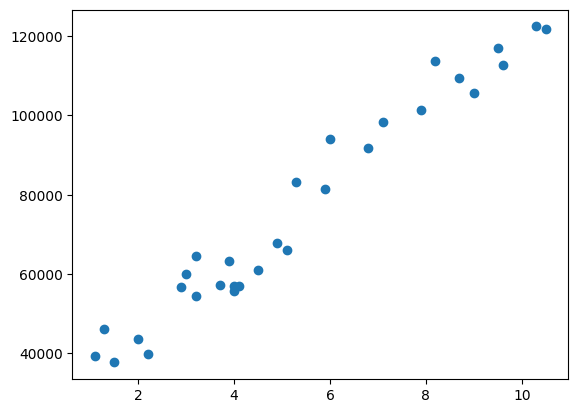

In [3]:
plt.scatter(x = dados_regressao.YearsExperience, y= dados_regressao.Salary)

## Exercício - 003

Ajuste o modelo de regressão para explicar a variável salário pela variável anos de experiência com a biblioteca _sklearn_.

In [4]:
model = linear_model.LinearRegression()

In [5]:
X = dados_regressao.drop(columns = ['Salary']).reset_index(drop=True)
y = dados_regressao.Salary

X_treinamento, X_teste, y_treinamento, y_teste = model_selection.train_test_split(X, y)

model.fit(X_treinamento, y_treinamento)

LinearRegression()

## Exercício - 004
Obtenha o coeficiente de determinação para o modelo ajustado e o coeficiente de correlação de _Pearson_. Qual a relação entre os coeficientes?

In [6]:
coeficiente_determinacao = model.score(X_teste, y_teste)
coeficiente_correlacao = scipy.stats.pearsonr(X_teste.YearsExperience, y_teste)

print(f'O coeficiente de determinação é {coeficiente_determinacao} e o coeficiente de correlação é {coeficiente_correlacao.statistic}')
print(f'A relação é que o coeficiente de determinação (R**2) == quadrado do coeficiente de correlação (r)')

# print(coeficiente_determinacao)
# print(coeficiente_correlacao.statistic)
# print(coeficiente_correlacao.statistic**2)


O coeficiente de determinação é 0.9621277498514418 e o coeficiente de correlação é 0.9883444339998425
A relação é que o coeficiente de determinação (R**2) == quadrado do coeficiente de correlação (r)


## Exercício - 005
Faça a predição do salário para a experiência de 4.3 anos de forma manual, e utilizando o método _predict_.

In [7]:
# Manual:
manual_prediction = model.coef_ * 4.3 + model.intercept_
print(f'O salário predito para 4.3 anos de experiência é: {manual_prediction}')

# Método predict:
method_prediction = model.predict([[4.3]])
print(f'O salário predito com o método predict é: {method_prediction}')

O salário predito para 4.3 anos de experiência é: [67055.27575248]
O salário predito com o método predict é: [67055.27575248]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Exercício - 006
Ajuste o modelo de regressão com a biblioteca `statsmodels` e interprete a estatística F para o modelo de regressão.

In [8]:
X_treinamento_2 = sm.add_constant(X_treinamento)
modelo_2 = sm.OLS(y_treinamento, X_treinamento_2).fit()

In [9]:
modelo_2.fvalue # Representa a diferença entre a variação entre os grupos e a variação interna dos grupos (quanto maior, menor a chance de a diferença ser ao acaso)

np.float64(398.7690726299372)

## Exercício - 007

Calcule os coeficientes para reta de regressão utilizando as seguinte formulações:

$
    \begin{align}
      \beta_1 &= \frac{\sum_{i=1}^n{(x_i-\bar{x})(y_i-\bar{y})}}{\sum_{i=1}^n{(x_i-\bar{x})^2}}\\
      \beta_0 &= \bar{y} - \beta_1\bar{x}\
    \end{align}
$

In [10]:
X_treinamento_series = X_treinamento['YearsExperience']
X_treinamento_series.head()

21    7.1
18    5.9
6     3.0
13    4.1
19    6.0
Name: YearsExperience, dtype: float64

In [11]:
b1 = ((X_treinamento_series - X_treinamento_series.mean()) * (y_treinamento - y_treinamento.mean())).sum() / ((X_treinamento_series - X_treinamento_series.mean())**2).sum()
b0 = y_treinamento.mean() - b1 * X_treinamento.mean()

## Exercício - 008
Faça o gráfico da reta sobre os pontos do conjunto de dados.

In [12]:
y_manual_pred = b1 * X_treinamento + b0

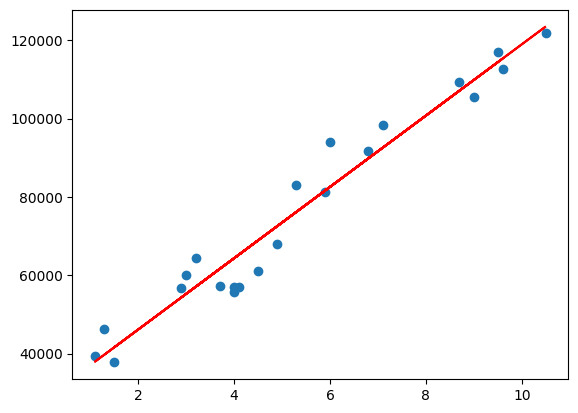

In [13]:
plt.scatter(X_treinamento_series, y_treinamento)
plt.plot(X_treinamento_series, y_manual_pred, color='red')
plt.show()

## Exercício - 009

Leia o arquivo _kc_house_data.csv_, remova as colunas _id_ e _date_ e crie uma variável resposta com a coluna _price_ e outra variável contendo todas as colunas, exceto _price_.

In [14]:
house_data = pd.read_csv('kc_house_data.csv')

In [15]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
house_data.drop(columns = ['id', 'date'], axis = 1, inplace=True)
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
y = house_data['price']
X = house_data.drop(columns = ['price'], axis = 1)

display(y.head(), X.head())

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exercício - 010
Utilize a função _pairplot_ da biblioteca `seaborn` para verificar a relação entre as variáveis: 'price',	'bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot'. Quais variáveis você diria que estão positivamente correlacionadas com o preço?

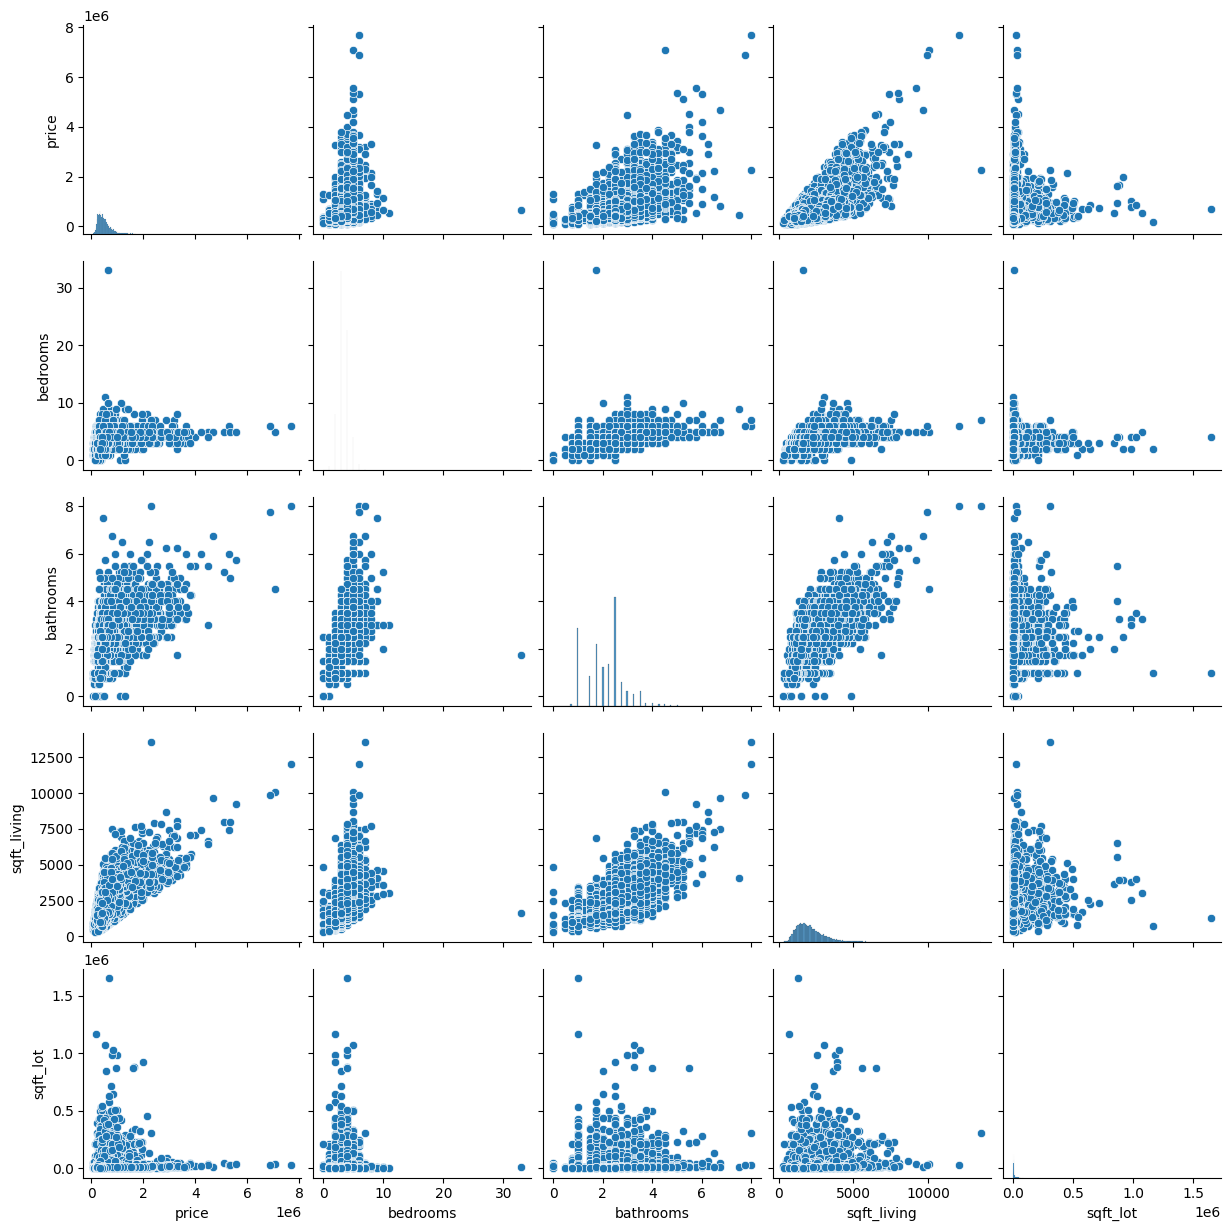

In [20]:
sns.pairplot(house_data[['price',	'bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot']])

# sqrt_living e bathrooms têm correlação

## Exercício - 011
Repita o ajuste da regressão com a biblioteca `statsmodels`. Quais coeficientes são estatísticamente significantes?

In [23]:
X_treinamento_2, X_teste_2, y_treinamento_2, y_teste_2 = model_selection.train_test_split(X, y)

In [24]:
X_treinamento_2 = sm.add_constant(X_treinamento_2)
modelo_2 = sm.OLS(y_treinamento_2, X_treinamento_2).fit()

In [25]:
modelo_2.summary()

# A única não significante é 'floors'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2199.
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        20:48:37   Log-Likelihood:            -2.2100e+05
No. Observations:               16209   AIC:                         4.420e+05
Df Residuals:                   16191   BIC:                         4.422e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.449e+06   3.39e+06      2.197      0.028    8.03e+05    1.41e+07
bedrooms      -3.583e+04   2157.895    -16.603      0.000   -4.01e+04   -3.16e+04
bathrooms      4.125e+04   3765.463     10.955      0.000    3.39e+04    4.86e+04
sqft_living     110.8857      2.623     42.271      0.000     105.744     116.027
sqft_lot          0.1136      0.055      2.057      0.040       0.005       0.222
floors         6197.7942   4157.582      1.491      0.136   -1951.525    1.43e+04
waterfront     5.832e+05   1.97e+04     29.533      0.000    5.44e+05    6.22e+05
view           5.026e+04   2477.814     20.284      0.000    4.54e+04    5.51e+04
condition      2.455e+04   2730.871      8.990      0.000    1.92e+04    2.99e+04
grade          9.517e+04   2491.390     38.199      0.000    9.03e+04       1e+05
sqft_above       72.0075      2.604     27.656      0.000      66.904      77.111
sqft_basement    38.8766      3.074     12.645      0.000      32.850      44.903
yr_built      -2618.7994     84.427    -31.019      0.000   -2784.285   -2453.314
yr_renovated     23.5296      4.204      5.597      0.000      15.290      31.769
zipcode        -593.0454     38.172    -15.536      0.000    -667.866    -518.225
lat            6.059e+05   1.24e+04     48.785      0.000    5.82e+05     6.3e+05
long          -2.159e+05   1.51e+04    -14.262      0.000   -2.46e+05   -1.86e+05
sqft_living15    21.5164      3.987      5.396      0.000      13.701      29.332
sqft_lot15       -0.3524      0.086     -4.112      0.000      -0.520      -0.184
==============================================================================
Omnibus:                    14360.225   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1744810.108
Skew:                           3.754   Prob(JB):                         0.00
Kurtosis:                      53.270   Cond. No.                     2.93e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.91e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Exercício - 012
Utilize a biblioteca [`sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) para executar a seleção de variáveis explicativas para regressão.

In [53]:
X_melhores = feature_selection.SelectKBest(k=3).fit_transform(X, y)

In [52]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [57]:
print(X_melhores)

[[1180.    7. 1340.]
 [2570.    7. 1690.]
 [ 770.    6. 2720.]
 ...
 [1020.    7. 1020.]
 [1600.    8. 1410.]
 [1020.    7. 1020.]]


## Exercício - 013
Divida o conjunto de dados _kc_house_data.csv_ em conjunto de treinamento e teste, ajuste o modelo de regressão múltipla no conjunto de treinamento e meça o ajuste no conjunto de teste.

In [64]:
modelo_3 = linear_model.LinearRegression()

In [60]:
X_treinamento_3, X_teste_3, y_treinamento_3, y_teste_3 = model_selection.train_test_split(X, y)

In [65]:
modelo_3.fit(X_treinamento_3, y_treinamento_3)

LinearRegression()

In [66]:
print(model_selection.cross_val_score(modelo_3, X, y))

[0.69615715 0.69103231 0.69273185 0.70769239 0.68534044]


## Exercício - 014
Utilize os dados abaixo para ajustar os seguinte modelos de regressão polinomiais:

$
    \begin{align}
y = \beta_0+\beta_1x\\
y = \beta_0+\beta_1x+\beta_2x^2\\
y = \beta_0+\beta_1x+\beta_2x^2+\beta_3x^3
    \end{align}
$

Faça um gráfico com todos os modelos.

In [70]:
x=np.linspace(-50,150,50)
y=0.15*x**3 - 20*x**2 + 5*x - 4 + 5000*np.random.randn(50)